# **Otimização de Processos (COQ897)** 
# *Prof. Argimiro R. Secchi*

$\
$

Segunda Lista de Exercícios - 2020

$\
$

***José Rodrigues Torraca Neto***

$\
$

6) Apresente a modelagem matemática do problema de otimização formulado no
exercício 3.

# ***Identificação de Sistemas - System Identification (SI)***

Um controle de processo bem sucedido tem como pré-requisito uma boa
identificação. A qualidade do modelo utilizado impacta profundamente o
desempenho do controlador.
Geralmente, os modelos de processos dinâmicos
não estão diretamente disponíveis, ou suas representações derivadas de
leis físicas podem ser complicadas demais para a implementação do controlador
devido à não-linearidade ou à presença de muitos
parâmetros desconhecidos. 

Por essas razões, os modelos lineares multivariáveis ​​são
muito utilizados na prática, e a maneira mais comum
de obtê-los é coletando dados de entradas e saídas do processo
em janelas de tempo específicas e utilizar algoritmos adequados para
obter os parâmetros do modelo de processo. 

Em resumo, o processo que envolve
projetar experimentos, coletar dados e construir modelos é
comumente referido como **identificação de sistema** (**SI**). Assim, o objetivo do SI é encontrar um modelo que seja uma
descrição boa o suficiente dos aspectos do sistema relevantes para determinado
propósito, como por exemplo, o controle.

Pode-se definir a identificação de sistemas como a área de modelagem matemática
a partir de dados experimentais. Mais detalhadamente, o procedimento
de identificação consiste em, a partir de dados amostrados, determinar o melhor
modelo (representação do sistema) dentro de uma classe de modelos, com base em
determinado critério. Assim, é possível destacar três componentes básicos
envolvidos na identificação de sistemas: o conjunto de dados, a classe de modelos e
o critério para estimação.

O conjunto de dados é normalmente obtido a partir de testes projetados
especificamente para o fim de identificação, de forma que ele contenha toda a
informação necessária. A definição da classe de modelos é uma etapa que
normalmente utiliza informações prévias do sistema. Por fim, o critério utilizado para a escolha do melhor modelo consiste nos algoritmos de identificação propriamente
ditos. Após a identificação, é preciso verificar se o modelo é bom o suficiente para a
aplicação pretendida, o que é feito na etapa de validação.

Os algoritmos de SI podem ser classificados em duas
categorias principais: **Métodos de Erro de Predição** (**PEM**) e
**Métodos de Identificação de Subespaços** - ***Subspace State Space Systems IDentification*** (**SID**). 

Os métodos PEM visam identificar modelos de função de transferência de entrada-saída,
enquanto que os métodos SID foram desenvolvidos para obter **modelos de espaço de estados linearmente invariantes no tempo** (**LTI**) diretamente dos dados de entrada / saída. 

$
\\
$

## ***Métodos de Identificação de Subespaços - Subspace State Space Systems IDentification (SID)***

Os métodos SID englobam uma série
de algoritmos de identificação que se baseiam em conceitos da teoria de sistemas,
geometria e álgebra linear numérica. Um grande número de aplicações dos métodos SID para sistemas simulados e
reais foram apresentados na literatura, sendo que essa técnica já alcançou um grau
significativo de maturidade e aceitação.

Entre as vantagens do SID, pode-se destacar a sua simplicidade e robustez
numérica, além da capacidade de tratar sistemas multivariáveis sem nenhum esforço
adicional. O modelo é identificado no formato de espaço de
estados, ​​o que é convenientes para o modelo
de controle preditivo (**MPC**). O único parâmetro
necessário, a ordem do modelo, é obtido durante o procedimento de identificação.
Ao contrário do que geralmente ocorre no PEM, no SID não é necessário resolver
problemas de otimização não-lineares. 

Em contra partida, os modelos obtidos via
SID são sub-ótimos, no sentido que eles não são uma solução ótima de um
problema de minimização do erro.

Além disso, os métodos SID são adequados para identificação de sistemas **MIMO** (Multiple Inputs Multiple Outputs). A complexidade da identificação para sistemas MIMO são iguais aos do SISO (Single Input Single Output). Não há necessidade de parametrização da estrutura MIMO, o que é uma propriedade muito atraente.

Logo, o nosso processo de SI será realizado utilizando um método SID. Os métodos SID não exigem que o usuário parametrize as matrizes do sistema antes de resolver um problema de otimização paramétrica e, como consequência, não sofrem de problemas relacionados a mínimos locais que muitas vezes levam a resultados de identificação insatisfatórios.

A formulação de um problema SID consiste em, a partir de medições de entrada-saída, estimar um modelo espaço de estados de um processo MIMO, dado que pode haver perturbações de estado, perturbações de entrada e perturbações de saída. Esse processo pode ser melhor visualizado pela figura abaixo:

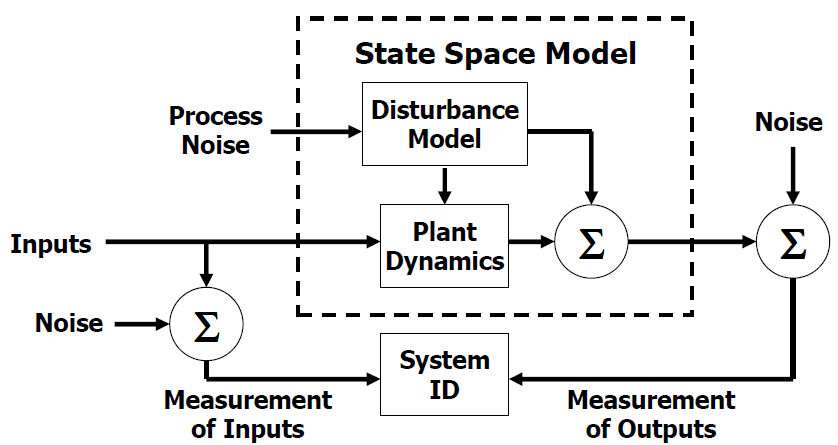


No SID, é considerado que o sistema com
$m$ entradas e $l$ saídas é representado por um modelo em espaço de estados da
seguinte forma:

>$
x_{k+1} = Ax_{k} + Bu_{k} + w_{k} \tag{1} \\
y_{k} = Cx_{k} + Du_{k} + v_{k} 
$

onde $x_{k} \in \mathbb{R}^n ,\ w_{k} \in \mathbb{R}^{n \times x}, \ v_{k} \in \mathbb{R}^l $,
são o estado do sistema, perturbações de estado e perturbações de saída, respectivamente.

$A \in \mathbb{R}^{n \times n} ,\ B \in \mathbb{R}^{n \times m} , \ C \in \mathbb{R}^{l \times n}, \ D \in \mathbb{R}^{l \times m} $, são as matrizes do sistema.

Uma outra forma comum de representação de sistemas MIMO é pela sua forma de *inovação*:

>$
x(t+1) = Ax(t) + Bu(t) + Ke(t) \tag{2} \\
y(t) = Cx(t) + Du(t) + e(t) 
$

onde $K \in \mathbb{R}^{n \times l}$, é usualmente referido como o preditor de ganho de Kalman.

O problema a ser resolvido pelo SID pode ser descrito como: dado um conjunto
grande de medições da entrada $u(t)$ e da saída $y(t)$ , geradas pelo sistema
desconhecido $\color{orange} {[2]}$, determinar a ordem $nx$ do sistema e estimar as matrizes do sistema
($A;\ B;\ C;\ D;\ K$) relativas a uma transformação de similaridade, a partir dos dados coletados.

As suas implementações podem ser classificadas em duas categorias:

1) Métodos tradicionais: **N4SID**, **MOESP** e **ORT**;

2) Métodos parcimoniosos: **PARSIM-P**, **PARSIM-S** e
**PARSIM-K**.

Os métodos parcimoniosos removem termos não causais das
projeções, impondo modelos causais. Os métodos mais antigos
são PARSIM-S e PARSIM-P. No entanto,
esses algoritmos são baseados na suposição de que a entrada é
não correlacionada com a perturbação de saída, portanto, eles podem falhar para
dados coletados em modo de malha fechada.

Os três métodos tradicionais, N4SID, MOESP e ORT,
podem ser vistos como uma decomposição em valores singulares (SVD) de uma
matriz ponderada. Por já terem sido testados extensivamente na literatura, além de usarem algoritmos que possibilitam aplicar identificação em malha
fechada, esse grupo de métodos será considerado para o problema proposto. 

O primeiro método, MOESP (multiple input multiple output
output-error state space), foi derivado de um ponto de vista puramente estatístico, enquanto que o terceiro foi derivado da estrutura
da teoria de realização estocástica. O segundo método reside
entre os outros dois, pois usa elementos da teoria da realização, bem como da abordagem estatística (dados).
No entanto, as implementações reais desses métodos funcionam
com dados reais e, portanto, usam uma abordagem estatística. Para a identificação do sistema do problema proposto, apenas o método N4SID será considerado.

Retornando ao sistema em $\color{orange} {[2]}$, a entrada $u$ e a saída $y$ são considerados como processos de segunda ordem, fracamente estacionários. Baseado nesta suposição, os espaços:

>$\boldsymbol{u} = \overline{span}\left \{..., \ u(t-1), \ u(t),\ u(t+1), \ ...  \right \}, \tag{3} 
$
>$
\boldsymbol{y} = \overline{span}\left \{..., \ y(t-1), \ y(t),\ y(t+1), \ ...  \right \} \tag{4}
$

podem ser definidos. A barra superior denota o fechamento com respeito
ao produto interno definido por $E\left \{ n\xi  \right \}$, onde; $n, \ \xi  \in \mathbf{u}$ , e $E\left \{ \cdot  \right \}$  o valor esperado, ou esperança. 

Além disso, permita que os
subespaços

>$\boldsymbol{u_{t}^{-}} = \overline{span}\left \{..., \ u(t-2), \ u(t-1)  \right \}, \tag{5} 
$
>$
\boldsymbol{u_{t}^{+}} = \overline{span}\left \{u(t),\ u(t+1), \ ...  \right \} \tag{6}$

sejam gerados pelos valores passados, bem como presentes e futuros
de $u$. 

Os espaços $\boldsymbol{y_{t}^{+}}$ e $\boldsymbol{y_{t}^{-}} 
$
são igualmente descritos por $y$.

Seja $a$ uma variável aleatória e $\boldsymbol{B} = \overline{span}\left \{ b \right \}$ o intervalo
da variável aleatória $b$, então a projeção ortogonal
$\hat{E}\left \{ a\mid \boldsymbol{B} \right \}$ é dada pelo valor esperado (esperança) condicional:

>$
\hat{E}\left \{ a\mid \boldsymbol{B} \right \} = {E}\left \{ a\mid b \right \} = \mu _{a} +  \sum_{ab}\sum_{bb}^{-1}\left ( b - \mu _{b} \right ) \tag{7}
$

Uma vez que ambos $a$ e $b$ são elementos de um espaço $\boldsymbol{H}$,
há também uma projeção no complemento ortogonal
de $\boldsymbol{B}$, calculada como:

>$
\hat{E}\left \{ a\mid \boldsymbol{B} ^\perp \right \} = a - \hat{E}\left \{ a\mid \boldsymbol{B} \right \}  = a- \mu _{a} -  \sum_{ab}\sum_{bb}^{-1}\left ( b - \mu _{b} \right ) \tag{8}
$

Agora, seja $\boldsymbol{C} = \overline{span}\left \{ c \right \}$ o intervalo de uma terceira variável aleatória
$c$ cumprindo a condição $\boldsymbol{B}\cap C=\left \{ 0 \right \}$. A projeção oblíqua $\hat{E}_{\parallel \boldsymbol{C}}\left \{ a\mid \boldsymbol{B} \right \}
$ de $a$ em $\boldsymbol{B}$ ao longo de $\boldsymbol{C}$ é dada pela
matriz de covariância condicional:

>$
\hat{E}_{\parallel \boldsymbol{C}}\left \{ a\mid \boldsymbol{B} \right \} = E\left \{ \hat{E}\left \{ a\mid \boldsymbol{C}^{\perp } \right \} \hat{E}\left \{ \boldsymbol{B}\mid \boldsymbol{C}^{\perp } \right \} \right \} \times \  E\left \{ \hat{E}\left \{ \boldsymbol{B}\mid \boldsymbol{C}^{\perp } \right \} \hat{E}\left \{ \boldsymbol{B}\mid \boldsymbol{C}^{\perp } \right \} \right \}^{-1} \ b = \sum_{ab\mid c}\sum_{bb\mid c}^{-1} b \tag{9}
$

## ***N4SID***

A ideia principal do método **N4SID** é identificar o sistema
dado pelas equações em $\color{orange} {[2]}$, de modo que o subsistema conduzido pela entrada exógena $u$ (referido como a parte "determinística"), bem como o
sistema afetado pela perturbação $e$ (referido como a parte "estocástica") irá compartilhar as matrizes $A$ e $C$.
A primeira etapa é o cálculo do espaço abrangido pelo
estados. Assumindo liberdade de feedback e riqueza suficiente
da entrada, este espaço é calculado através
da projeção oblíqua ($\vee $ denotando a soma vetorial):

>$
\boldsymbol{\chi}_{t}^{+/-}  = \hat{E}_{\parallel \boldsymbol{u_{t}^{+}}}\left \{ \boldsymbol{y}_{t}^{+}\mid \boldsymbol{y}_{t}^{-} \vee \boldsymbol{u_{t}^{-}} \right \} \tag{10}
$

Uma vez que a implementação numérica produz não apenas um
vetor base de $
\boldsymbol{\chi}_{t}^{+/-}$, mas também a matriz de observabilidade estendida,
os estados do sistema "determinístico" podem ser calculados por
meios da matriz de observabilidade estendida e das saídas:

>$
y_{d}\left ( t \right )= \hat{E} {\left \{ \boldsymbol{y}_{t}^{+}\mid \boldsymbol{y}_{t}^{-}\vee \boldsymbol{u}  \right \}} \quad (10) \\
y_{d}\left ( t +1 \right )= \hat{E} {\left \{ \boldsymbol{y}_{t+1}^{+}\mid \boldsymbol{y}_{t+1}^{-}\vee \boldsymbol{u}  \right \}} \tag{11}
$

Esses estados são usados para resolver uma equação de mínimos quadrados do tipo:

>$
\min\limits_{A,C,B,D} \begin{Vmatrix}
\begin{bmatrix}
x^{d}(t+1)\\ 
y(t)
\end{bmatrix} - \begin{bmatrix}
A & B\\ 
C & D
\end{bmatrix} \begin{bmatrix}
x^{d}(t)\\ 
y(t)
\end{bmatrix}
\end{Vmatrix}_{2} \tag{12}
$

para as matrizes do sistema. Os resíduos são usados ​​para o cálculo
do sistema "estocástico" e, portanto, para o cálculo
de $K$.


# ***Método N4SID aplicado ao Tennessee Eastman Process (TEP)***



# Tennessee Eastman Process

Como já dito anteriormente, o *Tennessee Eastman Process* é uma simulação realista de um processo químico da [Eastman Chemical Company](https://www.eastman.com/Pages/Home.aspx) e foi introduzida por [DOWNS e VOGEL (1993)](http://users.abo.fi/khaggblo/RS/Downs.pdf). É o benchmark mais utilizado na área de controle e monitoramento de processos, por fornecer um ambiente controlado para geração de dados, mas ainda assim realista.

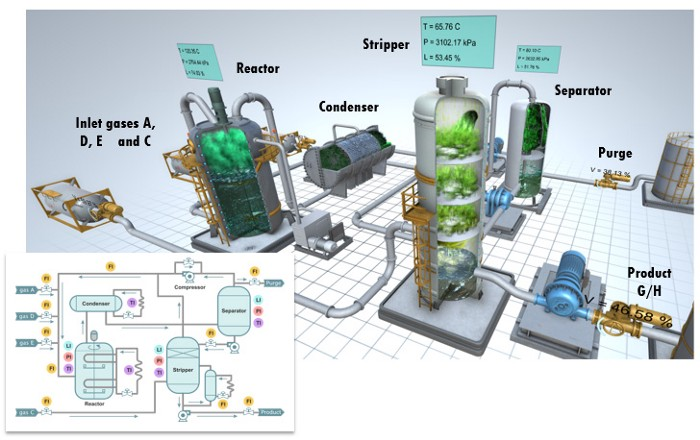

Os reagentes gasosos $A$, $C$, $D$ e $E$ e o inerte $B$ são alimentados ao reator, onde se formam os produtos $G$ e $H$, no estado líquido, e o subproduto $F$, por meio de quatro reações simultâneas irreversíveis e exotérmicas:

>$A$<sub>(g)</sub> + $C$<sub>(g)</sub> + $D$<sub>(g)</sub> &rarr; $G$<sub>(liq)</sub>
>
>$A$<sub>(g)</sub> + $C$<sub>(g)</sub> + $E$<sub>(g)</sub> &rarr; $H$<sub>(liq)</sub>
>
>$A$<sub>(g)</sub> + $E$<sub>(g)</sub> &rarr; $F$<sub>(liq)</sub>
>
>$3D$<sub>(g)</sub> &rarr; $2F$<sub>(liq)</sub>

A corrente de produto passa por um condensador e um separador líquido-vapor, respectivamente. O vapor resultante é reciclado por meio de um compressor, enquanto o condensado passa por um esgotador, da base do qual saem os produtos.

O processo apresenta 41 variáveis medidas e 12 variáveis manipuladas. Os tempos de amostragem variam entre 3, 6 e 15 minutos. São 20 perturbações na planta (falhas) pré-programadas na simulação, que variam entre aumento de variabilidade de algumas variáveis, agarramento de válvulas e tendência na cinética do processo, entre outras.

Segue uma descrição das variáveis e falhas (retirada do [link](https://github.com/camaramm/tennessee-eastman-profBraatz)):

### Medições de processo contínuas

Variable | Description | unit
-------- | ----------- | ----
`XMEAS(1)`  | A Feed  (stream 1)                  | kscmh
`XMEAS(2)`  | D Feed  (stream 2)                  | kg/hr
`XMEAS(3)`  | E Feed  (stream 3)                  | kg/hr
`XMEAS(4)`  | A and C Feed  (stream 4)            | kscmh
`XMEAS(5)`  | Recycle Flow  (stream 8)            | kscmh
`XMEAS(6)`  | Reactor Feed Rate  (stream 6)       | kscmh
`XMEAS(7)`  | Reactor Pressure                    | kPa gauge
`XMEAS(8)`  | Reactor Level                       | %
`XMEAS(9)`  | Reactor Temperature                 | Deg C
`XMEAS(10)` | Purge Rate (stream 9)               | kscmh
`XMEAS(11)` | Product Sep Temp                    | Deg C
`XMEAS(12)` | Product Sep Level                   | %
`XMEAS(13)` | Prod Sep Pressure                   | kPa gauge
`XMEAS(14)` | Prod Sep Underflow (stream 10)      | m3/hr
`XMEAS(15)` | Stripper Level                      | %
`XMEAS(16)` | Stripper Pressure                   | kPa gauge
`XMEAS(17)` | Stripper Underflow (stream 11)      | m3/hr
`XMEAS(18)` | Stripper Temperature                | Deg C
`XMEAS(19)` | Stripper Steam Flow                 | kg/hr
`XMEAS(20)` | Compressor Work                     | kW
`XMEAS(21)` | Reactor Cooling Water Outlet Temp   | Deg C
`XMEAS(22)` | Separator Cooling Water Outlet Temp | Deg C

### Medições de processo amostradas

- Reactor Feed Analysis (Stream 6)
  > - Sampling Frequency = 0.1 hr
  > - Dead Time = 0.1 hr
  > - Mole %
  
Variable | Description
-------- | -----------
`XMEAS(23)` | Component A
`XMEAS(24)` | Component B
`XMEAS(25)` | Component C
`XMEAS(26)` | Component D
`XMEAS(27)` | Component E
`XMEAS(28)` | Component F

- Purge Gas Analysis (Stream 9)
  > - Sampling Frequency = 0.1 hr
  > - Dead Time = 0.1 hr
  > - Mole %

Variable | Description
-------- | -----------
`XMEAS(29)` | Component A
`XMEAS(30)` | Component B
`XMEAS(31)` | Component C
`XMEAS(32)` | Component D
`XMEAS(33)` | Component E
`XMEAS(34)` | Component F
`XMEAS(35)` | Component G
`XMEAS(36)` | Component H

- Product Analysis (Stream 11)
  > - Sampling Frequency = 0.25 hr
  > - Dead Time = 0.25 hr
  > - Mole %

Variable | Description
-------- | -----------
`XMEAS(37)` | Component D
`XMEAS(38)` | Component E
`XMEAS(39)` | Component F
`XMEAS(40)` | Component G
`XMEAS(41)` | Component H

### Variáveis manipuladas

Variable | Description
-------- | -----------
`XMV(1)`  | D Feed Flow (stream 2)            (Corrected Order)
`XMV(2)`  | E Feed Flow (stream 3)            (Corrected Order)
`XMV(3)`  | A Feed Flow (stream 1)            (Corrected Order)
`XMV(4)`  | A and C Feed Flow (stream 4)
`XMV(5)`  | Compressor Recycle Valve
`XMV(6)`  | Purge Valve (stream 9)
`XMV(7)`  | Separator Pot Liquid Flow (stream 10)
`XMV(8)`  | Stripper Liquid Product Flow (stream 11)
`XMV(9)`  | Stripper Steam Valve
`XMV(10)` | Reactor Cooling Water Flow
`XMV(11)` | Condenser Cooling Water Flow
`XMV(12)` | Agitator Speed

### Perturbações de processo

Variable | Description
-------- | -----------
`IDV(1)`  | A/C Feed Ratio, B Composition Constant (Stream 4)          Step
`IDV(2)`  | B Composition, A/C Ratio Constant (Stream 4)               Step
`IDV(3)`  | D Feed Temperature (Stream 2)                              Step
`IDV(4)`  | Reactor Cooling Water Inlet Temperature                    Step
`IDV(5)`  | Condenser Cooling Water Inlet Temperature                  Step
`IDV(6)`  | A Feed Loss (Stream 1)                                     Step
`IDV(7)`  | C Header Pressure Loss - Reduced Availability (Stream 4)   Step
`IDV(8)`  | A, B, C Feed Composition (Stream 4)            Random Variation
`IDV(9)`  | D Feed Temperature (Stream 2)                  Random Variation
`IDV(10)` | C Feed Temperature (Stream 4)                  Random Variation
`IDV(11)` | Reactor Cooling Water Inlet Temperature        Random Variation
`IDV(12)` | Condenser Cooling Water Inlet Temperature      Random Variation
`IDV(13)` | Reaction Kinetics                                    Slow Drift
`IDV(14)` | Reactor Cooling Water Valve                            Sticking
`IDV(15)` | Condenser Cooling Water Valve                          Sticking
`IDV(16)` | Unknown
`IDV(17)` | Unknown
`IDV(18)` | Unknown
`IDV(19)` | Unknown
`IDV(20)` | Unknown


# ***Sistema em Malha Fechada***

É importante ressaltar que o processo opera sob **malha fechada**, ou seja, com a atuação de controladores automáticos. Nesse sentido, uma *falha* pode ser definida como uma perturbação no processo que a malha de controle não consegue gerenciar completamente.

Uma característica importante dessa
técnica é a redução das perturbações devida à ação do controlador. Além disso,
testes desse tipo são mais fáceis de executar, pois aspectos de especificação de
produto e de segurança e estabilidade do processo são tratados automaticamente,
eliminando atuações manuais. Ainda, segundo Hjalmarsson; Gevers e De Bruyne
(1996), para o propósito de **controle**, modelos de qualidade superior são obtidos a
partir de testes em malha fechada.

A desvantagem da identificação em malha fechada é que a entrada do processo é
correlacionada com os distúrbios não medidos, sempre que a ação do controlador
não é nula (FORSSELL; LJUNG, 1999). Problemas de identificabilidade podem
surgir, porém eles são superados pela adição de excitação externa persistentemente
excitante ou pelo uso de controladores com realimentação complexa, como o MPC,
que possui características não-lineares e variantes no tempo.

Abaixo está a representação em blocos de um sistema em malha fechada:

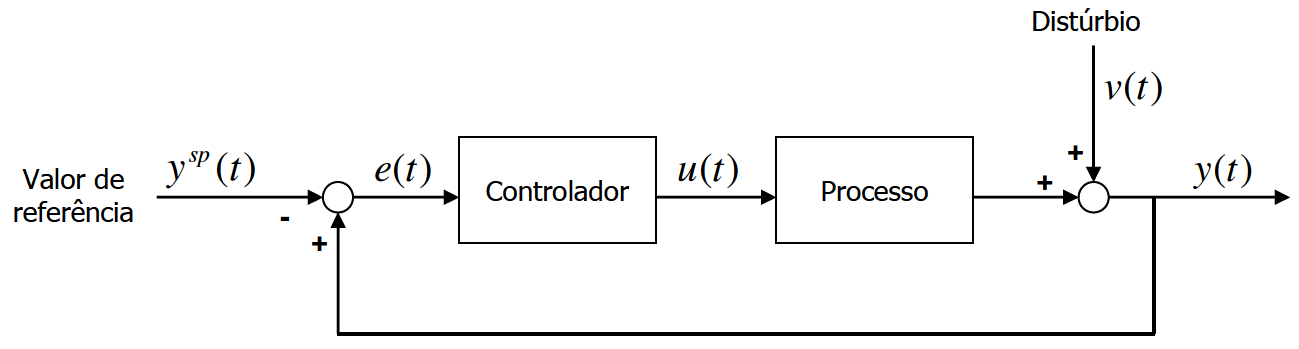

# ***Simulações do sistema TEP***

Boa parte dos estudos com a Tennessee Eastman utilizam um [pequeno conjunto de dados](https://github.com/camaramm/tennessee-eastman-profBraatz) já bem consolidado na literatura.

Os dados utilizados para este trabalho, no entanto, referem-se à uma extensão publicada por [RIETH *et al*. (2017)](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/6C3JR1), que rodaram várias simulações e aumentaram consideravelmente o tamanho do conjunto, tornando-o mais adequado para aplicações *big data*. 

Os dados encontram-se no formato RData, da [linguagem R](https://pt.wikipedia.org/wiki/R_(linguagem_de_programa%C3%A7%C3%A3o)). Para lê-los na linguagem Python, é necessário utilizar um módulo especial, como o [pyreadr](https://github.com/ofajardo/pyreadr):

In [ ]:
%%time

# localização do dataset na sua máquina
PATH = '/kaggle/input/tennessee-eastman-process-simulation-dataset/'

train_normal_path = PATH+'TEP_FaultFree_Training.RData'
train_faulty_path = PATH+'TEP_Faulty_Training.RData'

test_normal_path = PATH+'TEP_FaultFree_Testing.RData'
test_faulty_path = PATH+'TEP_Faulty_Testing.RData'

train_normal_complete = pyreadr.read_r(train_normal_path)['fault_free_training']
#train_faulty_complete = pyreadr.read_r(train_fault_path)['faulty_training']

#test_normal_complete = pyreadr.read_r(test_normal_path)['fault_free_testing']
test_faulty_complete = pyreadr.read_r(test_faulty_path)['faulty_testing']

CPU times: user 1min 13s, sys: 6.72 s, total: 1min 20s
Wall time: 1min 20s


Inspecionando os DataFrames, separados em conjuntos de treino e de teste (procedimento usual em técnicas de *Machine Learning*):

In [ ]:
train_normal_complete

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.0,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0.0,1.0,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0.0,1.0,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0.0,1.0,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0.0,1.0,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,0.0,500.0,496,0.29325,3640.1,4473.0,9.1949,26.867,42.379,2700.2,...,53.429,29.249,60.773,21.532,40.451,34.064,48.953,48.291,40.812,18.756
249996,0.0,500.0,497,0.29134,3625.7,4506.2,9.2109,26.889,42.291,2700.6,...,53.830,28.975,61.517,21.750,42.762,42.645,51.055,48.589,40.933,19.360
249997,0.0,500.0,498,0.29438,3600.2,4478.3,9.1957,26.820,42.448,2700.3,...,54.163,28.676,61.656,21.487,42.109,39.770,46.770,48.648,41.465,19.344
249998,0.0,500.0,499,0.25269,3683.5,4486.4,9.2832,27.188,42.757,2697.4,...,53.453,24.889,61.564,21.392,39.334,42.274,43.623,48.797,39.835,18.512


O DataFrame de treino foi gerado com 500 simulações, cada uma delas contendo 500 pontos de amostragem (totalizando 500\*500 = 250000 pontos no conjunto de dados). As três primeiras colunas identificam os ID's da falha, da simulação e da amostra, respectivamente. As demais colunas contêm as medições de processo.

In [ ]:
test_faulty_complete

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,1,1.0,1,0.25171,3672.4,4466.3,9.5122,27.057,42.473,2705.6,...,54.494,24.527,59.710,22.357,40.149,40.074,47.955,47.300,42.100,15.345
1,1,1.0,2,0.25234,3642.2,4568.7,9.4145,26.999,42.586,2705.2,...,53.269,24.465,60.466,22.413,39.956,36.651,45.038,47.502,40.553,16.063
2,1,1.0,3,0.24840,3643.1,4507.5,9.2901,26.927,42.278,2703.5,...,54.000,24.860,60.642,22.199,40.074,41.868,44.553,47.479,41.341,20.452
3,1,1.0,4,0.25153,3628.3,4519.3,9.3347,26.999,42.330,2703.9,...,53.860,24.553,61.908,21.981,40.141,40.066,48.048,47.440,40.780,17.123
4,1,1.0,5,0.21763,3655.8,4571.0,9.3087,26.901,42.402,2707.7,...,53.307,21.775,61.891,22.412,37.696,38.295,44.678,47.530,41.089,18.681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9599995,20,500.0,956,0.26494,3719.6,4536.7,9.2265,26.875,42.401,2708.3,...,54.382,26.018,62.068,20.708,37.589,35.121,45.496,42.653,40.816,15.846
9599996,20,500.0,957,0.25252,3724.0,4494.3,9.1873,27.221,41.999,2706.0,...,54.236,25.098,61.557,20.655,40.934,38.391,43.699,42.832,41.853,18.486
9599997,20,500.0,958,0.25164,3700.8,4537.3,9.2514,26.659,42.180,2704.7,...,53.722,25.185,61.169,20.650,40.694,35.961,45.643,43.147,40.538,18.127
9599998,20,500.0,959,0.29097,3641.8,4525.2,9.3053,26.823,42.234,2705.0,...,54.185,28.771,61.140,20.323,39.774,39.807,45.989,43.318,40.826,17.305


O DataFrame de teste foi gerado com 500 simulações para cada um dos 20 cenário de falha, cada uma delas contendo 960 pontos de amostragem (totalizando 500\*20\*960 = 9600000 pontos no conjunto de dados). Como no conjunto de treino, as três primeiras colunas identificam os ID's da falha, da simulação e da amostra, respectivamente, e as demais colunas contêm as medições de processo.

# ***Modelo de Controle Preditivo (MPC)***

O modelo de controle preditivo (**MPC**) refere-se a uma classe de algoritmos
computacionais de controle que utilizam um modelo explícito para prever o
comportamento das saídas futuras da planta. Essa tecnologia é amplamente
utilizada na indústria de processos químicos e geralmente é a técnica padrão usada
em aplicações de controle avançado (GONZÁLEZ; ADAM; MARCHETTI, 2008).

Existem basicamente três enfoques utilizados em MPC. Cada enfoque adota uma
estrutura de modelo. As possíveis estruturas são: resposta ao degrau ou resposta ao
impulso (**FIR**, do inglês Finite Impulse Response); **função de transferência**; e modelo
em espaço de estados **negrito** (WANG; YOUNG, 2006). Os primeiros algoritmos de controle
preditivo baseavam-se em resposta ao degrau ou FIR. Por esse motivo essa é a
técnica mais empregada nos controladores comerciais. Entretanto, no meio
acadêmico, o enfoque mais utilizado atualmente, e que tem se mostrado mais
eficiente, é o MPC baseado em **modelo em espaço de estados**, que já foi apresentado na primeira seção, e que será utilizado neste trabalho.

## ***Modelo em espaço de estados***

O estado de um sistema dinâmico é um conjunto de variáveis que, com o
conhecimento delas em determinado instante de tempo, em conjunto com a
informação das entradas futuras, determina completamente o comportamento futuro
do sistema (ODLOAK, 2008). Essas variáveis são geralmente agrupadas em um
vetor denominado vetor de estados. Esse vetor funciona como uma ponte de
interligação entre o passado e o futuro.
Um sistema linear invariante no tempo (LTI, do inglês Linear Time Invariant) pode
ser representado por um modelo em espaço de estados com intervalos de tempo
discretos da forma descrita pelo sistema $\color{orange} {[2]}$.

Duas observações importantes podem ser feitas acerca desse modelo:

1.   O modelo apresentado é incremental em relação às entradas. Essa representação foi escolhida, pois no MPC o uso das entradas na forma
incremental é uma condição necessária para um controle livre de off-set.
2.   Para processos típicos da indústria química, a matriz D é nula, ou seja, não
há realimentação direta das entradas nas saídas.

A identificação em subespaços, que foi detalhada nas seções anteriores, é uma forma
de se obter as matrizes ($A;\ B;\ C;\ D;\ K$) do modelo em espaço de estados diretamente de dados
coletados da planta.

Quando um modelo em espaço de estados é utilizado para predição $n$ passos à
frente, como é o caso em aplicações de MPC, é necessário, em cada período de
amostragem, atualizar o estado predito com o estado atual da planta. Seja o estado
predito pelo modelo no instante t +1:

>$
\hat{x}(t+1)=A\hat{x}(t) + B\Delta u(t) \tag{13} 
$

Se o modelo usado for perfeito e as condições iniciais forem exatas, o estado predito
será idêntico ao estado real da planta, não sendo necessário nenhum tipo de
atualização. Porém, na prática, isso não acontece. Nos casos em que os
componentes do vetor de estados são propriedades medidas, a atualização é
realizada facilmente por uma simples substituição do estado predito pelo estado real
disponível. Nos demais casos é preciso utilizar um estimador de estados. A
reconstrução do estado é feita com base no erro de predição da saída
$( y − C\hat{x} − D\Delta u )$ da seguinte forma:

>$\hat{x}(t+1\mid t)=A\hat{x}(t\mid t-1) + B\Delta u(t) + K[y(t)-C\hat{x}(t\mid t-1) - D\Delta u(t)] \tag{14}$

A notação $\hat{x}(j\mid s)$ é usada para indicar a predição do estado no instante j com base
nas medidas disponíveis até o instante s . O parâmetro K é a matriz de ganhos
que deve ser propriamente escolhida, sendo determinada pelo estimador de
estados. O cálculo da matriz K foi definido no final da seção N4SID.

## ***Metodologia do MPC***

Neste trabalho será utilizado o MPC de horizonte finito com modelo em espaço de
estados na forma incremental, representado pelo sistema $\color{orange} {[2]}$. Será considerado
apenas o caso de sistemas sem ação direta da entrada na saída ($D = 0$). A cada
período de amostragem o controlador resolve o seguinte problema de otimização:

>$
\min\limits_{\Delta u_{t}} J_{t} = \sum\limits_{j=1}^{np} (y(t+j\mid t)-y^{sp})^{T}\ Q(y(t+j\mid t)-y^{sp}) + \sum\limits_{j=0}^{nc-1} \Delta u(t+j\mid t)^{T}\ R\Delta u(t+j\mid t) \tag{14}
$

sujeito às seguintes restrições:

>$
-\Delta u_{max}\leq \Delta u(t+j\mid t)\leq \Delta u_{max}, \quad j=0,...,nc-1\tag{15}\\
$
>$
u_{min}\leq u(t+j\mid t)\leq u_{max}, \quad j=0,...,nc-1\tag{16}
$

, onde:

>$
Q \in \mathbb{R}^{l\times l}: \quad matriz \ de \ pesos \ das \ saídas; \\
R \in \mathbb{R}^{m\times m}: \quad matriz \ de \ supressão \ das \ entradas; \\
y^{sp} \in \mathbb{R}^{l}: \quad vetor \ de \ referência \ (set-point) \ das \ saídas; \\
u_{min} \in \mathbb{R}^{m}: \quad valores \ mínimos \ para \ as \ entradas; \\
u_{max} \in \mathbb{R}^{m}: \quad valores \ máximos \ para \ as \ entradas; \\
\Delta u_{max} \in \mathbb{R}^{m}: \quad variação \ máxima \ das \ entradas \ em \ cada \ instante; \\
np: \quad horizonte \ de \ predição; \\
nc: \quad horizonte \ de \ controle; \\
J_{t}: \quad função \ custo \ do \ controlador \ no \ instante \ t; \\
\Delta u_{t}=[\Delta u(t\mid t)^{T}\quad\Delta u(t+1\mid t)^{T}\quad...\quad\Delta u(t+nc-1\mid t)^{T}]^{T}
$

O problema acima pode ser escrito na forma de programação quadrática (QP). Para
isso, deve-se colocar as predições das saídas futuras em um único vetor. O próximo
passo consiste em determinar a relação desse vetor com as variáveis do problema
$(\Delta u_{t})$ e com o modelo em espaço de estados.

A partir das equações de $\color{orange} {[2]}$ do modelo e considerando $D = 0$, pode-se escrever:

>$
y(t+1\mid t) = Cx(t+1\mid t)= CAx(t) +CB\Delta u(t\mid t) \\
y(t+2\mid t) = CAx(t+1\mid t) +CB\Delta u(t+1\mid t) = CA^{2}x(t) +CAB\Delta u(t\mid t)+CB\Delta u(t+1\mid t) \\
y(t+3\mid t) = CA^{3}x(t) +CA^{2}B\Delta u(t\mid t)+CAB\Delta u(t+1\mid t) +CB\Delta u(t+2\mid t)\\
\begin{matrix}
\cdot  & \quad \quad \quad \quad \quad \quad \quad \quad \cdot \\ 
\cdot  & \quad \quad \quad \quad \quad \quad \quad \quad\cdot \\ 
\cdot  & \quad \quad \quad \quad \quad \quad \quad \quad\cdot 
\end{matrix} \\
y(t+j\mid t) = CA^{j}x(t) +CA^{j-1}B\Delta u(t\mid t)+CA^{j-2}B\Delta u(t+1\mid t)+ \ ...\ +CB\Delta u(t+j-1\mid t)\\
$

No MPC de horizonte finito considera-se que a partir do instante k + nc −1 as
entradas permanecem constantes, ou seja, $\Delta u(t+nc\mid t) = \Delta u(t+nc+1\mid t) = \ ... \ = 0$.

Então, pode-se escrever:

>$
\begin{bmatrix}
y(t+1\mid t)\\ 
y(t+2\mid t)\\ 
\vdots  \\ 
y(t+nc\mid t)\\
y(t+nc+1\mid t)
\\ \vdots
\\ y(t+np\mid t)
\end{bmatrix} =

\begin{bmatrix}
CA\\ 
CA^{2}\\ 
\vdots  \\ 
CA^{nc}\\
CA^{nc+1}
\\ \vdots
\\ CA^{np}
\end{bmatrix} x(t) +

\begin{bmatrix}
CB & 0 &\cdots   & 0\\ 
CAB & CB & \cdots  & 0\\ 
\vdots  &  \vdots &  \ddots & \vdots \\ 
CA^{nc-1}B & CA^{nc-2}B  & \cdots  & CB\\ 
CA^{nc}B & CA^{nc-1}B & \cdots  & CAB\\ 
\vdots  & \vdots  & \ddots  & \vdots \\ 
CA^{np-1}B & CA^{np-2}B & \cdots  & CA^{np-nc}B
\end{bmatrix} 

\begin{bmatrix}
\Delta u(t\mid t)\\ 
\Delta u(t+1\mid t)\\ 
\vdots\\ 
\Delta u(t+nc-1\mid t)
\end{bmatrix}
$

A equação acima, que representa o vetor de predições das saídas futuras, pode ser resumida na forma:

>$
Y(t)=\Psi x(t) +\Theta \Delta u_{t} \tag{17}
$

Também é necessário representar o vetor com as entradas futuras $(u_{t})$, presente na
restrição $\color{orange} {[16]}$, em função do vetor das variações das entradas futuras $(\Delta u_{t})$. Por
definição tem-se:

>$
u(t\mid t)=\Delta u(t\mid t) + u(t-1)\\
u(t+1\mid t)=\Delta u(t+1\mid t) + \Delta u(t\mid t) + u(t-1)\\
\quad \quad \quad \vdots \quad  \quad \quad \quad \quad \quad \quad \quad \quad\vdots \\
u(t+nc-1\mid t)=\Delta u(t+nc-1\mid t) + \ ... \ + \Delta u(t\mid t) + u(t-1)\\
$

As equações acima podem ser reescritas na forma:

>$
\begin{bmatrix}
u(t\mid t)\\ 
u(t+1\mid t)\\ 
\vdots \\ 
u(t+nc-1\mid t)
\end{bmatrix} = 

\begin{bmatrix}
I_{m}\\ 
I_{m}\\ 
\vdots \\ 
I_{m}
\end{bmatrix} u(t-1) + 

\begin{bmatrix}
I_{m} & 0 & \cdots  & 0\\ 
I_{m} & I_{m} & \cdots  & 0\\ 
\vdots  & \vdots  & \ddots  & \vdots \\ 
I_{m} & I_{m} & \cdots  & I_{m} 
\end{bmatrix} 

\begin{bmatrix}
\Delta u(t\mid t)\\ 
\Delta u(t+1\mid t)\\ 
\vdots \\ 
\Delta u(t+nc-1\mid t)
\end{bmatrix}
$

A relação acima representa o vetor de entradas futuras, que pode ser então resumido como:

>$
u_{t}=\overline{I}u(t-1)+ \overline{M}\Delta u_{t} \tag{18}
$

,sendo $ u_{t}=[u(t\mid t)^{T}\quad u(t+1\mid t)^{T}\quad...\quad u(t+nc-1\mid t)^{T}]^{T}
$

Utilizando as equações $\color{orange} {[17]}$ e $\color{orange} {[18]}$, o problema de otimização representado pela
função objetivo $\color{orange} {[14]}$ e pelas restrições $\color{orange} {[15]}$ e $\color{orange} {[16]}$ pode ser escrito como:

>$
\min\limits_{\Delta u_{t}} J_{t} = \Delta u_{t}^{T}H_{1}\Delta u_{t}+2c_{f1}^{T}\Delta u_{t}+c_{1} \tag{19}
$

sujeito à restrição:

>$
A_{ineq1} \Delta u_{t}\leq b_{ineq1} \tag{20}
$
, onde:

>$
H_{1} = \Theta ^{T} \ \overline{Q}\ \Theta + \overline{R};\\
c_{f1}^{T}=[\Psi x(t)-Y_{sp}]^{T}\ \overline{Q}\ \Theta;\\
c_{1} = [\Psi x(t)-Y_{sp}]^{T}\ \overline{Q}\ [\Psi x(t)-Y_{sp}];\\
A_{ineq1} = \begin{bmatrix}
(I_{m,nc})^{T} & (-I_{m,nc})^{T} & (\overline{M})^{T} & (-\overline{M})^{T}
\end{bmatrix}^{T};\\
b_{ineq1} = \begin{bmatrix}
(\overline{I}\Delta u_{max})^{T} & (-\overline{I}\Delta u_{max})^{T} & (\overline{I}(u_{max}-u(t-1))^{T} & (\overline{I}(u(t-1)-u_{min}))^{T} 
\end{bmatrix}^{T};\\
Y_{sp} = \begin{bmatrix}
(y^{sp})^{T} & (y^{sp})^{T} & \cdots  & (y^{sp})^{T}
\end{bmatrix}^{T};\\
\overline{Q} = \begin{bmatrix}
Q & 0 & \cdots  & 0\\ 
0 & Q & \cdots  & 0\\ 
\vdots  & \vdots  & \ddots  & \vdots \\ 
0 & 0 & \cdots  & Q
\end{bmatrix};\\
\overline{R} = \begin{bmatrix}
R & 0 & \cdots  & 0\\ 
0 & R & \cdots  & 0\\ 
\vdots  & \vdots  & \ddots  & \vdots \\ 
0 & 0 & \cdots  & R
\end{bmatrix};\\
$

Após o cálculo das ações de controle futuras pela resolução do problema de
otimização $\color{orange} {[14]}$-$\color{orange} {[16]}$, a primeira ação de controle $(u(t))$ é adicionada ao sistema.
As saídas do processo são então medidas e com essas novas informações, no
próximo período de amostragem, todo o procedimento é repetido.